In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as TF


In [2]:
observations =1001

ws=np.random.uniform(low=-10,high=10,size=(observations,1))
xs=np.random.uniform(low=-10,high=10,size=(observations,1))
zs=np.random.uniform(-10,10,(observations,1))

generated_inputs= np.column_stack((ws,xs,zs))

noise=np.random.uniform(-1,1,(observations,1))

generated_targets=37.6529+0.0965*ws+0.0860*xs+0.1872*zs+noise

np.savez('TF_intro',inputs=generated_inputs,targets=generated_targets)

In [3]:
Traning_data=np.load('TF_intro.npz')

In [4]:
inputs_size=3
outputs_size=1

model=TF.keras.Sequential([
    TF.keras.layers.Dense(outputs_size)
    ])

model.compile(optimizer='SGD',loss='mean_squared_error')

model.fit(Traning_data['inputs'],Traning_data['targets'],epochs=100,verbose=2)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/100
1001/1001 - 0s - loss: 872.1355
Epoch 2/100
1001/1001 - 0s - loss: 234.1571
Epoch 3/100
1001/1001 - 0s - loss: 66.1993
Epoch 4/100
1001/1001 - 0s - loss: 18.3684
Epoch 5/100
1001/1001 - 0s - loss: 5.2542
Epoch 6/100
1001/1001 - 0s - loss: 1.7360
Epoch 7/100
1001/1001 - 0s - loss: 0.7224
Epoch 8/100
1001/1001 - 0s - loss: 0.4734
Epoch 9/100
1001/1001 - 0s - loss: 0.3872
Epoch 10/100
1001/1001 - 0s - loss: 0.3694
Epoch 11/100
1001/1001 - 0s - loss: 0.3562
Epoch 12/100
1001/1001 - 0s - loss: 0.3610
Epoch 13/100
1001/1001 - 0s - loss: 0.3652
Epoch 14/100
1001/1001 - 0s - loss: 0.3551
Epoch 15/100
1001/1001 - 0s - loss: 0.3585
Epoch 16/100
1001/1001 - 0s - loss: 0.3682
Epoch 17/100
1001/1001 - 0s - loss: 0.3570
Epoch 18/100
1001/1001 - 0s - loss: 0.3578
Epoch 19/100
1001/1001 - 0s - loss: 0.3594
Epoch 20/100
1001/1001 - 0s - loss: 0.3645
Epoch 21/100
1001/1001 - 

In [5]:
model.layers[0].get_weights()

[array([[0.10249966],
        [0.0248181 ],
        [0.17890288]], dtype=float32),
 array([37.683968], dtype=float32)]

In [6]:
model.predict_on_batch(Traning_data['inputs']).round(1)

array([[36.5],
       [37.2],
       [37.4],
       ...,
       [36.9],
       [37.7],
       [35.9]], dtype=float32)

In [7]:
Traning_data['targets'].round(1)

array([[37.1],
       [36.1],
       [38.5],
       ...,
       [36. ],
       [37. ],
       [36.3]])

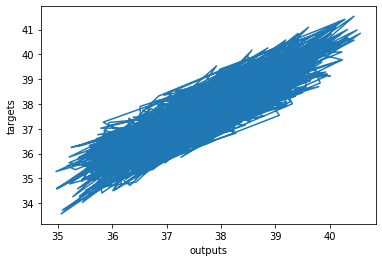

In [8]:
plt.plot(np.squeeze(model.predict_on_batch(Traning_data['inputs'])),np.squeeze(Traning_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()